In [84]:
#Read the database (json file in local) and turn it into a pandas dataframe
import pandas as pd
df = pd.read_json('filtered_recipes111.json')
print(df.head())

       id                                              title  servings  \
0  644094                                Funghetti Trifolati         6   
1  650112        Linefish Simmered In A Spiced Coconut Gravy         4   
2  661669  Stir Fry Mushrooms In Butter, Garlic And White...         4   
3  664708     Vegetarian Spring Rolls With Garlic Lime Sauce        10   
4  715493                     Slow Cooker Red Beans and Rice         5   

   pricePerServing  priceCalculated dishClass  \
0           144.27           24.045     Mixed   
1           586.70          146.675     Mixed   
2            97.58           24.395     Mixed   
3            85.99            8.599     Mixed   
4           161.12           32.224     Mixed   

                                           mealTypes      winePairing  vegan  \
0  antipasti, starter, snack, appetizer, antipast...  No wine pairing   True   
1              lunch, main course, main dish, dinner  No wine pairing  False   
2  antipasti, starte

In [85]:
#Dataset exploration
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1807 non-null   int64  
 1   title            1807 non-null   object 
 2   servings         1807 non-null   int64  
 3   pricePerServing  1807 non-null   float64
 4   priceCalculated  1807 non-null   float64
 5   dishClass        1807 non-null   object 
 6   mealTypes        1807 non-null   object 
 7   winePairing      1807 non-null   object 
 8   vegan            1807 non-null   bool   
 9   glutenFree       1807 non-null   bool   
 10  vegetarian       1807 non-null   bool   
 11  dairyFree        1807 non-null   bool   
 12  isKosher         1807 non-null   bool   
 13  isHalal          1807 non-null   bool   
 14  restrictions     1807 non-null   object 
 15  ingredients      1807 non-null   object 
 16  seasons          1807 non-null   object 
 17  seasonText    

In [86]:
#Contar el numero de filas con cada columna booleana en True
boolean_columns = ['glutenFree', 'vegan', 'vegetarian', 'dairyFree', 'isKosher', 'isHalal']
for col in boolean_columns:
    count_true = df[col].sum()
    print(f"{col}: {count_true} recipes")

glutenFree: 917 recipes
vegan: 214 recipes
vegetarian: 704 recipes
dairyFree: 689 recipes
isKosher: 1282 recipes
isHalal: 1130 recipes


In [87]:
#Para cada columna booleana, contar el número de filas con cada categoría en dishClass
for col in boolean_columns:
    print(f"\n{col}:")
    for dish_class in df['dishClass'].unique():
        count = df[df['dishClass'] == dish_class][col].sum()
        print(f"  {dish_class}: {count} recipes")



glutenFree:
  Mixed: 558 recipes
  Main: 285 recipes
  Dessert: 27 recipes
  Starter: 47 recipes

vegan:
  Mixed: 126 recipes
  Main: 67 recipes
  Dessert: 3 recipes
  Starter: 18 recipes

vegetarian:
  Mixed: 417 recipes
  Main: 177 recipes
  Dessert: 73 recipes
  Starter: 37 recipes

dairyFree:
  Mixed: 434 recipes
  Main: 205 recipes
  Dessert: 12 recipes
  Starter: 38 recipes

isKosher:
  Mixed: 783 recipes
  Main: 363 recipes
  Dessert: 71 recipes
  Starter: 65 recipes

isHalal:
  Mixed: 712 recipes
  Main: 273 recipes
  Dessert: 90 recipes
  Starter: 55 recipes


In [ ]:
#Discard columns not in instances
df = df.drop(columns=['servings', 'pricePerServing', 'seasonText', 'glutenFree', 'vegan', 'vegetarian', 'dairyFree', 'isKosher', 'isHalal'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1807 non-null   int64  
 1   title            1807 non-null   object 
 2   priceCalculated  1807 non-null   float64
 3   dishClass        1807 non-null   object 
 4   mealTypes        1807 non-null   object 
 5   winePairing      1807 non-null   object 
 6   restrictions     1807 non-null   object 
 7   ingredients      1807 non-null   object 
 8   seasons          1807 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 127.2+ KB


In [70]:
#See unique values in each column
for column in ['restrictions', 'ingredients', 'seasons']:
        unique_values = set()
        for item in df[column]:
                unique_values.update(item)
        print(f"Column: {column}(list), Unique Values (num = {len(unique_values)}): {unique_values}")
for column in ['dishClass', 'winePairing']: # string type
        unique_values = set()
        for item in df[column]:
            l = item.strip(', ') 
            unique_values.add(l)
        print(f"Column: {column}(str), Unique Values (num = {len(unique_values)}): {unique_values}")

unique_values = set()
for item in df['mealTypes']:
    l = item.split(', ')
    unique_values.update(l)
    
print(f"Column: mealTypes (str), Unique Values (num = {len(unique_values)}): {unique_values}")



Column: restrictions(list), Unique Values (num = 4): {'gluten free', 'dairy free', 'vegan', 'vegetarian'}
Column: ingredients(list), Unique Values (num = 3608): {'marinated feta', 'non-dairy topping cream', 'less-sodium soy sauce', "tropical food's", 'fresly ginger', 'tiny drop of almond extract', 'pineapple preserves', 'bell pepper', 'ghirardelli ground cocoa', 'chili garlic sauce', 'indian breadcrumbs shopping list', 'soy sauce', 'imitation crab meat/shrimp', 'cherry jello', 'slivered almonds', 'beansprouts', 'mushroom', 'flour tortillas', 'vegan chocolate', 'sweet potato vermicelli noodles', 'pie crust', 'frozen/fresh raspberries', 'spice', 'swedish pearl sugar', 'ground pepper', 'semisweet chocolate', 'soya milk', 'milk to brush the bread', 'onions', 'garlic cloves', 'peppercorns cracked', 'ground cumin', 'cup plus 2 condensed milk', 'pork seasoning mix', 'punnet baby tomatoes', 'natural yoghurt', 'ditilini pasta', 'grain sandwich thins', 'chili flakes', 'quaker oats', 'monterrey j

In [88]:

#Check for inconsistent mealTypes entries
df[~df['mealTypes'].isin(['Main', 'Mixed', 'Starter', 'Dessert'])].head()

,id,title,servings,pricePerServing,priceCalculated,dishClass,mealTypes,winePairing,vegan,glutenFree,vegetarian,dairyFree,isKosher,isHalal,restrictions,ingredients,seasons,seasonText
0,644094,Funghetti Trifolati,6,144.27,24.045,Mixed,"antipasti, starter, snack, appetizer, antipast...",No wine pairing,True,True,True,True,True,False,"[vegan, gluten free, vegetarian, dairy free]","[extra virgin olive oil, garlic, variety of mu...",[any-season],Any season
1,650112,Linefish Simmered In A Spiced Coconut Gravy,4,586.70,146.675,Mixed,"lunch, main course, main dish, dinner",No wine pairing,False,True,False,True,True,False,"[gluten free, dairy free]","[garlic, thumb-sized piece of ginger, chilli p...",[any-season],Any season
2,661669,"Stir Fry Mushrooms In Butter, Garlic And White...",4,97.58,24.395,Mixed,"antipasti, starter, snack, appetizer, antipast...",No wine pairing,False,True,False,False,True,False,[gluten free],"[shitaki mushrooms, mushroom, garlic, butter, ...",[any-season],Any season
3,664708,Vegetarian Spring Rolls With Garlic Lime Sauce,10,85.99,8.599,Mixed,"fingerfood, antipasti, starter, snack, appetiz...",No wine pairing,False,True,False,True,True,False,"[gluten free, dairy free]","[butter leaf lettuce, carrots, ginger, hoisin ...",[any-season],Any season
4,715493,Slow Cooker Red Beans and Rice,5,161.12,32.224,Mixed,"side dish, lunch, main course, main dish, dinner",No wine pairing,False,True,False,False,False,True,[gluten free],"[ancho chili powder, bay leaves, butter, beans...",[any-season],Any season


Estadísticos de la columna 'priceCalculated':
Media: 94.7267624143818
Mediana: 33.6525
Max: 3892.71
Min: 0.0495


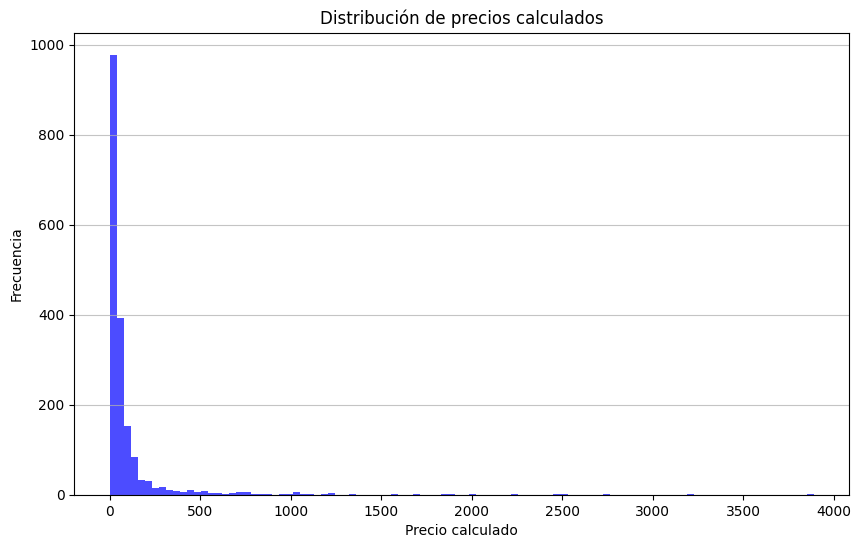

In [73]:
#Sacar estadisticos y graficar la columna priceCalculated 
import numpy as np
print("Estadísticos de la columna 'priceCalculated':")
print(f"Media: {np.mean(df['priceCalculated'])}")
print(f"Mediana: {np.median(df['priceCalculated'])}")
print(f"Max: {np.max(df['priceCalculated'])}")
print(f"Min: {np.min(df['priceCalculated'])}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['priceCalculated'], bins=100, color='blue', alpha=0.7)
plt.title('Distribución de precios calculados')
plt.xlabel('Precio calculado')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()
